# DRILL: Fixing Features to fit Assumtions of Linear Regresion -- Kristofer Schobert

We have created a multivariate linear regression model, but the assumptions of homoscedasticity (the variance of our residuals remaining constant regardless of the values of the input variables) and multivariate normatlity (the error of our model being normally distributed) are not being met. Here are some efforts to try to fix the issue. 


After trying differnt features, the best I was able to find is (TV - 150)^2

In [104]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# # Suppress annoying harmless error.
# warnings.filterwarnings(
#     action="ignore",
#     module="scipy",
#     message="^internal gelsd"
# )


# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

#data['TV_minus_150_squared'] = (data.TV-150)**2
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales']  #.values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]

Intercept: 
 2.9388893694594067

R-squared:
0.8972106381789521


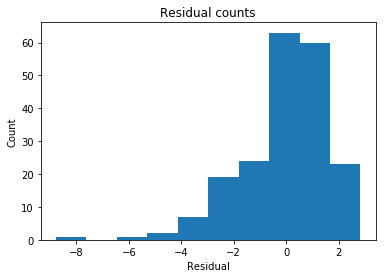

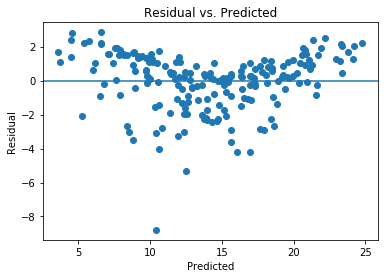

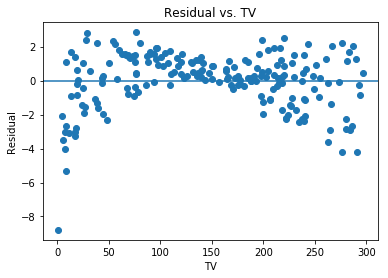

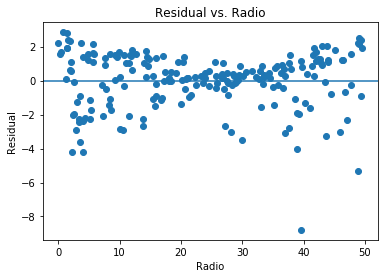

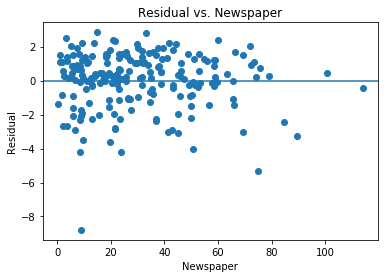

In [120]:
predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(data['TV'], residual)
plt.xlabel('TV')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. TV')
plt.show()

plt.scatter(data['Radio'], residual)
plt.xlabel('Radio')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Radio')
plt.show()

plt.scatter(data['Newspaper'], residual)
plt.xlabel('Newspaper')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Newspaper')
plt.show()

Here we see that the histogram of the residual has some negative skew. We want this to be normally distributed. 

Also, the variance in the residuals is not constant as we change our inputs. As the value of 'TV' approaches 150, the variance decreases, likewise for 'Radio' as it approaches 25. 

Perhaps a deeper look at our features will help us solve this issue. 


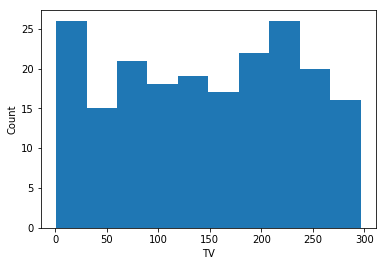

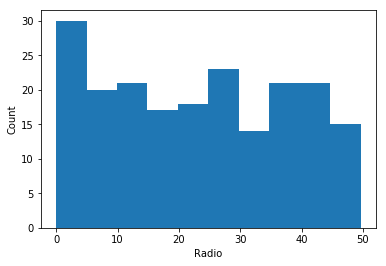

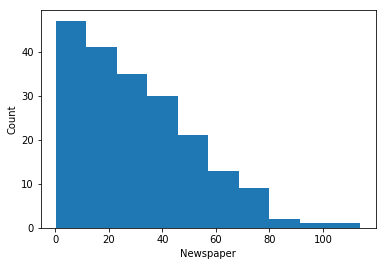

In [112]:
plt.hist(data.TV)
plt.xlabel('TV')
plt.ylabel('Count')
plt.show()

plt.hist(data.Radio)
plt.xlabel('Radio')
plt.ylabel('Count')
plt.show()

plt.hist(data.Newspaper)
plt.xlabel('Newspaper')
plt.ylabel('Count')
plt.show()

This distrobution of Newspaper valuse is unlike the others. Maybe applying a function to make these values more evenly distributed will help.

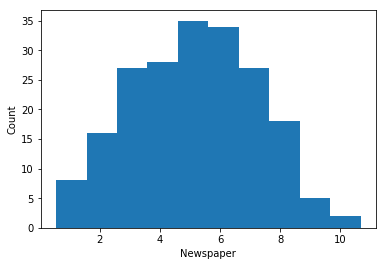

In [117]:
plt.hist(data.Newspaper**.5)
plt.xlabel('Newspaper')
plt.ylabel('Count')
plt.show()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [0.04575006 0.18769763 0.00692624]

Intercept: 
 2.8930985510462683

R-squared:
0.8972008603619454


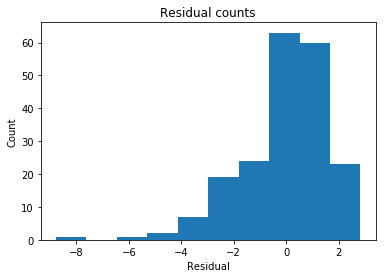

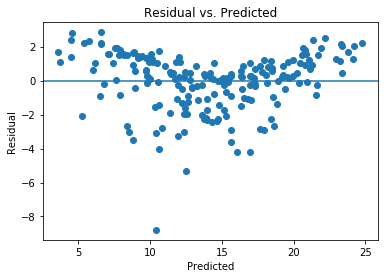

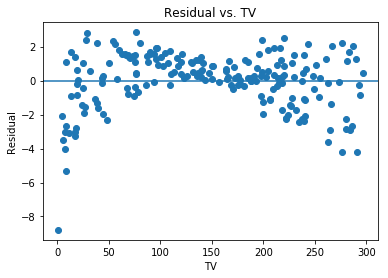

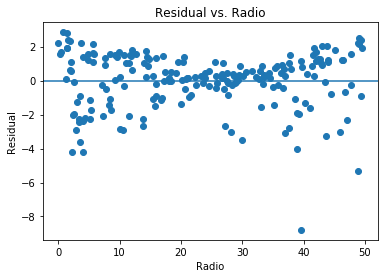

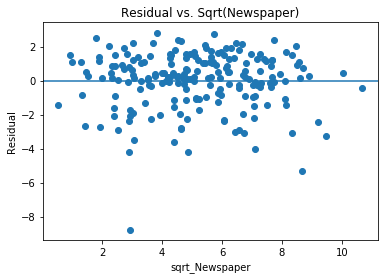

In [121]:
# # Suppress annoying harmless error.
# warnings.filterwarnings(
#     action="ignore",
#     module="scipy",
#     message="^internal gelsd"
# )


# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

data['sqrt_Newspaper'] = (data.Newspaper)**.5
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales']  #.values.reshape(-1, 1)
X = data[['TV','Radio','sqrt_Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(data['TV'], residual)
plt.xlabel('TV')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. TV')
plt.show()

plt.scatter(data['Radio'], residual)
plt.xlabel('Radio')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Radio')
plt.show()

plt.scatter(data['sqrt_Newspaper'], residual)
plt.xlabel('sqrt_Newspaper')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Sqrt(Newspaper)')
plt.show()

This seems to have done nothing... Let's try something else. 

We notice that the variance in the residual is smallest when TV is 150. Maybe if we subtract 150 from the TV values and apply some function like squaring the result. We will meet our assumptions for a linear regression.


Coefficients: 
 [-0.00020966  0.20588309  0.00976096]

Intercept: 
 10.474098002280103

R-squared:
0.4008046222393676


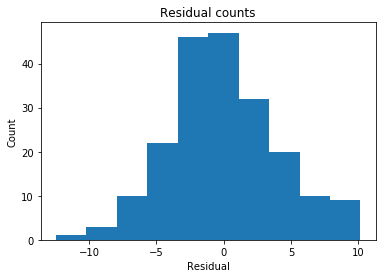

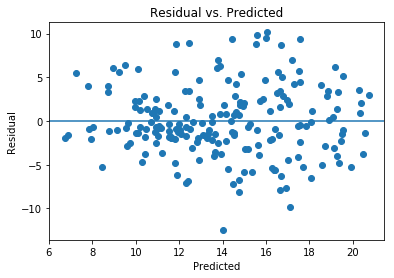

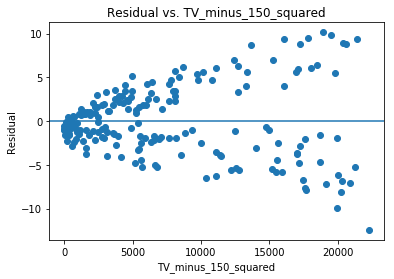

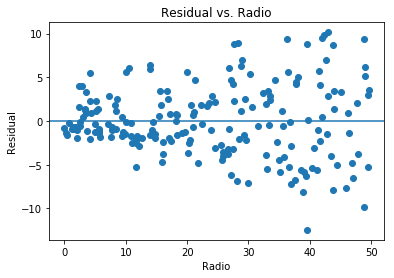

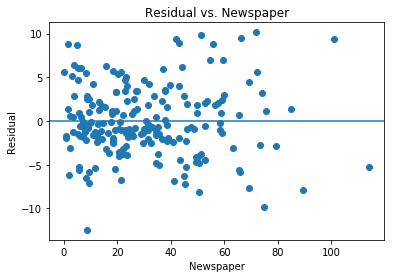

In [124]:
data['TV_minus_150_squared'] = (data.TV - 150)**2
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales']  #.values.reshape(-1, 1)
X = data[['TV_minus_150_squared','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

plt.scatter(data['TV_minus_150_squared'], residual)
plt.xlabel('TV_minus_150_squared')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. TV_minus_150_squared')
plt.show()

plt.scatter(data['Radio'], residual)
plt.xlabel('Radio')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Radio')
plt.show()

plt.scatter(data['Newspaper'], residual)
plt.xlabel('Newspaper')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Newspaper')
plt.show()

## Conclusion

This last attempted worked well. While the residuals do increase in variance as the value of (TV-150)^2 increases, at least the skewness in the error has gone away, and the variance of the residuals does not vary much with the predicted values.